In [3]:
# function

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.

    Arguments
    ---------
    cf:            confusion matrix to be passed in

    group_names:   List of strings that represent the labels row by row to be shown in each square.

    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'

    count:         If True, show the raw number in the confusion matrix. Default is True.

    normalize:     If True, show the proportions for each category. Default is True.

    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.

    xyticks:       If True, show x and y ticks. Default is True.

    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.

    sum_stats:     If True, display summary statistics below the figure. Default is True.

    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.

    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.

    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)

                              
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

    

[[106  28]
 [ 34  55]]
[[100   2]
 [  6 131]]
[[107  27]
 [ 38  51]]
[[100   2]
 [  7 130]]
[[59 19]
 [ 8 11]]
[[ 84   1]
 [ 14 141]]


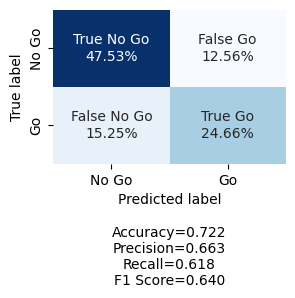

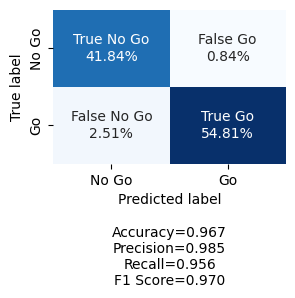

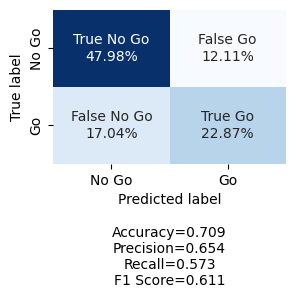

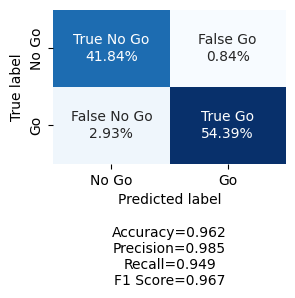

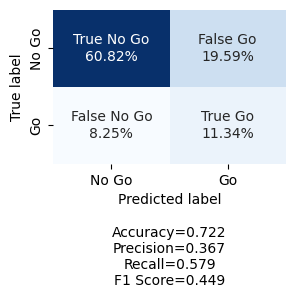

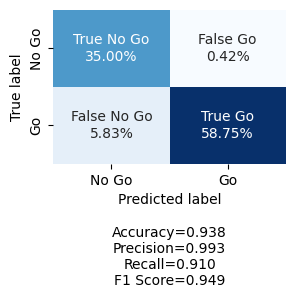

In [8]:
# confusion matricies for non v2v stuff
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# confusion matricies 
confusion_rocket_sign= np.array([[106, 28],[34, 55]])
confusion_rocket_light= np.array([[100,2],[6, 131]])
confusion_hc2_sign= np.array([[107,27],[38,51]])
confusion_hc2_light= np.array([[100,2],[7,130]])

confusion_tsf_sign = np.array([[59,19],[8,11]])
confusion_tsf_light= np.array([[84, 1],[14,141]])

all_mods = [confusion_rocket_sign, confusion_rocket_light, confusion_hc2_sign, confusion_hc2_light, confusion_tsf_sign, confusion_tsf_light]
labels = ['True No Go','False Go','False No Go','True Go']
categories = ['No Go', 'Go']
p1 = sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True)

for i in range(len(all_mods)):
    print(all_mods[i])
    
    confusion_rocket_sign_plt = make_confusion_matrix(all_mods[i], 
                              group_names=labels,
                              categories=categories, 
                              cmap="Blues",
                              count=False,
                              sum_stats=True,
                              figsize=(3,2),
                              xyplotlabels=True,
                              cbar=False
                                                      
                             )


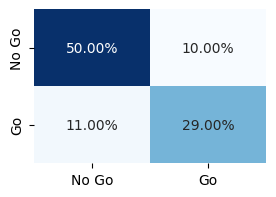

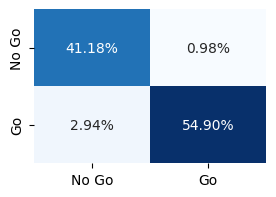

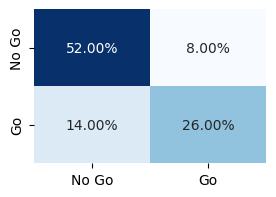

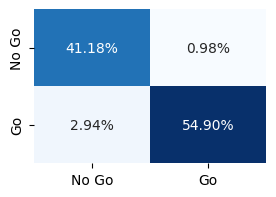

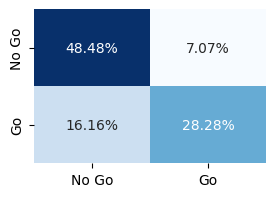

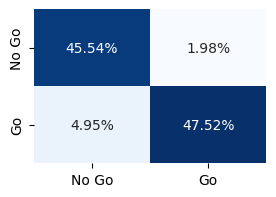

In [5]:
# confusion matricies for v2v data

# # Model	Data Set	V2V? (Y/N)	TP	FP	FN	TN
# TSF	Sign	Y	0.48	0.07	0.16	0.28
# ROCKET	Sign	Y	0.50	0.10	0.11	0.29
# HC2	Sign	Y	0.52	0.08	0.14	0.26
# TSF	Lights	Y	0.46	0.02	0.05	0.48
# ROCKET	Lights	Y	0.42	0.01	0.03	0.56
# HC2	Lights	Y	0.42	0.01	0.03	0.56


import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# confusion matricies 
confusion_rocket_sign= np.array([[0.5, .1],[.11, .29]])
confusion_rocket_light= np.array([[.42,.01],[0.03, 0.56]])
confusion_hc2_sign= np.array([[0.52,0.08],[0.14,0.26]])
confusion_hcr_light= np.array([[0.42,0.01],[0.03,0.56]])

confusion_tsf_sign = np.array([[0.48,0.07],[0.16,0.28]])
confusion_tsf_light= np.array([[0.46, 0.02],[0.05,0.48]])

all_mods = [confusion_rocket_sign, confusion_rocket_light, confusion_hc2_sign, confusion_hcr_light, confusion_tsf_sign, confusion_tsf_light]
labels = ['True No Go','False Go','False No Go','True Go']
categories = ['No Go', 'Go']
p1 = sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True)

for i in range(len(all_mods)):
    
    confusion_rocket_sign_plt = make_confusion_matrix(all_mods[i], 
                              group_names=False,
                              categories=categories, 
                              cmap="Blues",
                              count=False,
                              sum_stats=False,
                              figsize=(3,2),
                              xyplotlabels=False,
                              cbar=False
                                                      
                             )


In [ ]:
confusion_rocket_sign= np.array([[106, 28],[34, 55]])
confusion_rocket_light= np.array([[100,2],[6, 131]])
confusion_hc2_sign= np.array([[107,27],[38,51]])
confusion_hc2_light= np.array([[100,2],[7,130]])

confusion_tsf_sign = np.array([[59,19],[8,11]])
confusion_tsf_light= np.array([[84, 1],[14,141]])

